In [ ]:
#sales forecasting
#regression model

In [102]:
#import needed libraries
#do !pip install scikit-learn
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn import metrics, linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [3]:
df_features = pd.read_csv(r"data\Data\Sales Forecasting\features.csv")
df_stores = pd.read_csv(r"data\Data\Sales Forecasting\stores.csv")
df_train = pd.read_csv(r"data\Data\Sales Forecasting\train.csv")


In [88]:
print(df_features.shape)
print(df_stores.shape)
print(df_train.shape)

(8190, 12)
(45, 3)
(421570, 5)


In [15]:
df_train.Store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [20]:
df_stores.shape

(45, 3)

In [19]:
df_features.shape

(8190, 12)

In [21]:
#doing inner join between features and stores and checked shape and it did'nt loose any records
df_features_stores = pd.merge(df_features, df_stores, on='Store', how='inner')

In [22]:
df_features_stores.shape

(8190, 14)

In [25]:
df_train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [23]:
df_features_stores

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,B,118221
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,B,118221
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,B,118221
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,B,118221


In [26]:
df_features_stores_train = pd.merge(df_features_stores, df_train, on= ['Store', 'Date'], how='inner')

In [41]:
nan_count = df_features_stores_train.isna().sum()

In [42]:
nan_count

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday_x     0
Type            0
Size            0
Dept            0
Weekly_Sales    0
IsHoliday_y     0
dtype: int64

In [39]:
df_features_stores_train['MarkDown1'].fillna(0.0, inplace=True)
df_features_stores_train['MarkDown2'].fillna(0.0, inplace=True)
df_features_stores_train['MarkDown3'].fillna(0.0, inplace=True)
df_features_stores_train['MarkDown4'].fillna(0.0, inplace=True)
df_features_stores_train['MarkDown5'].fillna(0.0, inplace=True)
#df_features_stores_train

C:\Users\kanna\AppData\Local\Temp\ipykernel_43048\2235535217.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_features_stores_train['MarkDown1'].fillna(0.0, inplace=True)
C:\Users\kanna\AppData\Local\Temp\ipykernel_43048\2235535217.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [47]:
df_features_stores_train.IsHoliday_x.unique()

array([0., 1.])

In [46]:
df_features_stores_train['IsHoliday_x'].replace({False:0.0, True:1.0}, inplace=True)

C:\Users\kanna\AppData\Local\Temp\ipykernel_43048\2663422204.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_features_stores_train['IsHoliday_x'].replace({False:0.0, True:1.0}, inplace=True)
C:\Users\kanna\AppData\Local\Temp\ipykernel_43048\2663422204.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting'

In [52]:
df_features_stores_train.groupby('IsHoliday_y').count()
#false = 391909
#true = 29661

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Type,Size,Dept,Weekly_Sales
IsHoliday_y,,,,,,,,,,,,,,,,
0.0,391909,391909,391909,391909,391909,391909,391909,391909,391909,391909,391909,391909,391909,391909,391909,391909
1.0,29661,29661,29661,29661,29661,29661,29661,29661,29661,29661,29661,29661,29661,29661,29661,29661


In [51]:
df_features_stores_train['IsHoliday_y'].replace({False:0.0, True:1.0}, inplace=True)

C:\Users\kanna\AppData\Local\Temp\ipykernel_43048\2711424250.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_features_stores_train['IsHoliday_y'].replace({False:0.0, True:1.0}, inplace=True)
C:\Users\kanna\AppData\Local\Temp\ipykernel_43048\2711424250.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting'

In [54]:
df_features_stores_train.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday_x     float64
Type             object
Size              int64
Dept              int64
Weekly_Sales    float64
IsHoliday_y     float64
dtype: object

In [55]:
df_type = pd.get_dummies(df_features_stores_train['Type'], dtype=float)

In [57]:
df_type.shape

(421570, 3)

In [58]:
data_new = pd.concat([df_type, df_features_stores_train], axis=1)

In [59]:
data_new

,A,B,C,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Type,Size,Dept,Weekly_Sales,IsHoliday_y
0,1.0,0.0,0.0,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0.0,A,151315,1,24924.50,0.0
1,1.0,0.0,0.0,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0.0,A,151315,2,50605.27,0.0
2,1.0,0.0,0.0,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0.0,A,151315,3,13740.12,0.0
3,1.0,0.0,0.0,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0.0,A,151315,4,39954.04,0.0
4,1.0,0.0,0.0,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0.0,A,151315,5,32229.38,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,0.0,1.0,0.0,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0.0,B,118221,93,2487.80,0.0
421566,0.0,1.0,0.0,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0.0,B,118221,94,5203.31,0.0
421567,0.0,1.0,0.0,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0.0,B,118221,95,56017.47,0.0
421568,0.0,1.0,0.0,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0.0,B,118221,97,6817.48,0.0


In [60]:
data_new_f = data_new.drop(['Date','Type'], axis=1)

In [61]:
data_new_f.dtypes

A               float64
B               float64
C               float64
Store             int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday_x     float64
Size              int64
Dept              int64
Weekly_Sales    float64
IsHoliday_y     float64
dtype: object

In [62]:
data_new_f.describe()

,A,B,C,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Size,Dept,Weekly_Sales,IsHoliday_y
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,0.511132,0.387824,0.101044,22.200546,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,0.070358,136727.915739,44.260317,15981.258123,0.070358
std,0.499877,0.487255,0.301387,12.785297,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,0.255750,60980.583328,30.492054,22711.183519,0.255750
min,0.000000,0.000000,0.000000,1.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,0.000000,34875.000000,1.000000,-4988.940000,0.000000
25%,0.000000,0.000000,0.000000,11.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,0.000000,93638.000000,18.000000,2079.650000,0.000000
50%,1.000000,0.000000,0.000000,22.000000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,0.000000,140167.000000,37.000000,7612.030000,0.000000
75%,1.000000,1.000000,0.000000,33.000000,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,0.000000,202505.000000,74.000000,20205.852500,0.000000
max,1.000000,1.000000,1.000000,45.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,1.000000,219622.000000,99.000000,693099.360000,1.000000


<Axes: >

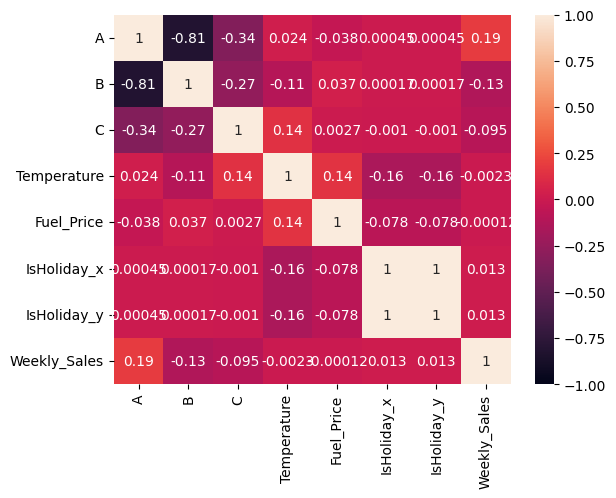

In [65]:
sns.heatmap(data_new_f[['A','B', 'C','Temperature','Fuel_Price','IsHoliday_x','IsHoliday_y','Weekly_Sales']].corr(), vmin=-1,annot= True)

In [64]:
data_new_f.columns

Index(['A', 'B', 'C', 'Store', 'Temperature', 'Fuel_Price', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'IsHoliday_x', 'Size', 'Dept', 'Weekly_Sales',
       'IsHoliday_y'],
      dtype='object')

In [66]:
feature_columns = ['A', 'B', 'C', 'Store', 'Temperature', 'Fuel_Price', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'IsHoliday_x', 'Size', 'Dept']

In [67]:
X = data_new_f[feature_columns]
y = data_new_f['Weekly_Sales']

In [68]:
data_new_f.shape

(421570, 18)

In [70]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(337256, 16)
(337256,)
(84314, 16)
(84314,)


In [73]:
x_train

,A,B,C,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Size,Dept
368380,1.0,0.0,0.0,39,52.89,3.409,6997.37,1891.53,115.26,7093.82,9198.59,218.955100,7.244,1.0,184109,55
160775,0.0,1.0,0.0,17,6.23,2.891,0.00,0.00,0.00,0.00,0.00,127.191774,6.866,0.0,93188,40
31543,1.0,0.0,0.0,4,78.83,2.671,0.00,0.00,0.00,0.00,0.00,126.076645,7.372,0.0,205863,7
30033,1.0,0.0,0.0,4,39.91,2.752,0.00,0.00,0.00,0.00,0.00,126.605064,8.623,0.0,205863,2
114759,0.0,1.0,0.0,12,48.07,3.657,6935.50,23438.57,0.00,2289.80,9526.73,130.244000,12.187,0.0,112238,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73349,1.0,0.0,0.0,8,72.96,3.899,0.00,0.00,0.00,0.00,0.00,219.415986,6.297,0.0,155078,18
371403,1.0,0.0,0.0,40,40.54,2.834,0.00,0.00,0.00,0.00,0.00,131.824290,5.892,0.0,155083,31
312201,1.0,0.0,0.0,32,58.29,3.903,11832.54,0.00,117.43,1881.84,4729.13,197.606353,8.090,0.0,203007,5
267336,1.0,0.0,0.0,28,53.77,2.987,0.00,0.00,0.00,0.00,0.00,126.578286,13.975,0.0,206302,97


In [74]:
model_lr = linear_model.LinearRegression()
print(model_lr)

LinearRegression()


In [75]:
model_lr.fit(x_train, y_train)

LinearRegression()

In [77]:
print(model_lr.coef_)
model_lr.intercept_

[-1.76054980e+03 -2.12223329e+03  3.88278308e+03 -1.38994152e+02
  1.52209836e+01 -5.28888994e+02  6.68686236e-03  2.15548055e-03
  1.22493337e-01  5.11995408e-03  9.64269417e-02 -2.60233243e+01
 -2.18736487e+02  4.51609835e+02  9.74062097e-02  1.12007216e+02]


8914.072871313332

In [78]:
y_pred = model_lr.predict(x_test)

In [79]:
print(metrics.mean_squared_error(y_test,y_pred))
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_absolute_percentage_error(y_test, y_pred))
print(metrics.r2_score(y_test, y_pred))
#only 8% r2 score which is less accuracy

464158668.72764385
14509.147899538193
1.7910816014110746e+16
0.08773077221070935


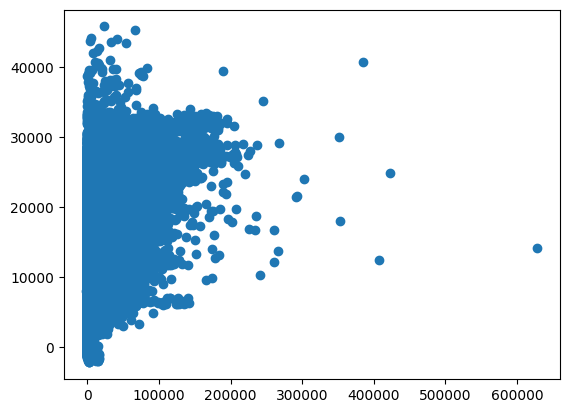

In [80]:
plt.scatter(y_test,y_pred)
#no linearity in data

In [82]:
#Decision Tree regressor - basic parameters yet to do hyper parameter tuning
model_dt = DecisionTreeRegressor()
model_dt = model_dt.fit(x_train,y_train)

In [83]:
y_pred = model_dt.predict(x_test)

In [84]:
print(metrics.mean_squared_error(y_test,y_pred))
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_absolute_percentage_error(y_test, y_pred))
print(metrics.r2_score(y_test, y_pred))
#good 89% r2 score which is good accuracy

54201793.00624953
2376.8673890457103
154955790485603.12
0.8934704203927726


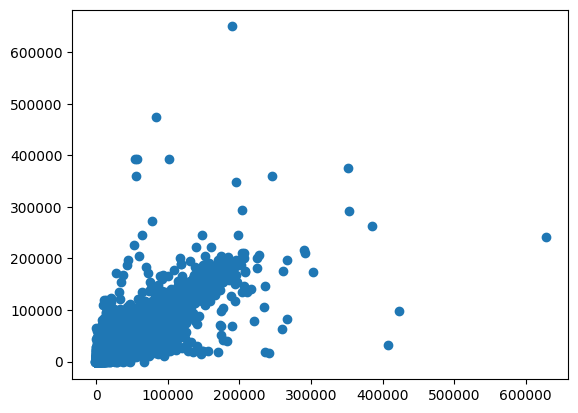

In [85]:
plt.scatter(y_test,y_pred)

<Axes: >

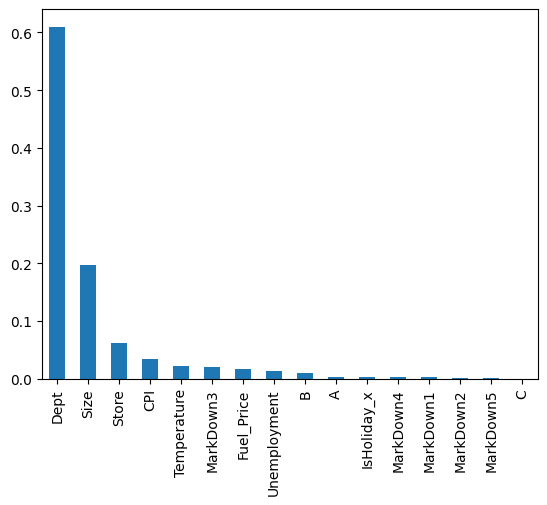

In [95]:
feature_importances = pd.Series(model_dt.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_importances.plot.bar()

In [90]:
#Random forest regressor - basic parameters yet to do hyper parameter tuning
model_rf = RandomForestRegressor()
model_rf = model_rf.fit(x_train, y_train)

In [92]:
y_pred = model_rf.predict(x_test)

28711008.7257061
1843.2873294328347
97946145020197.73
0.943570654769737


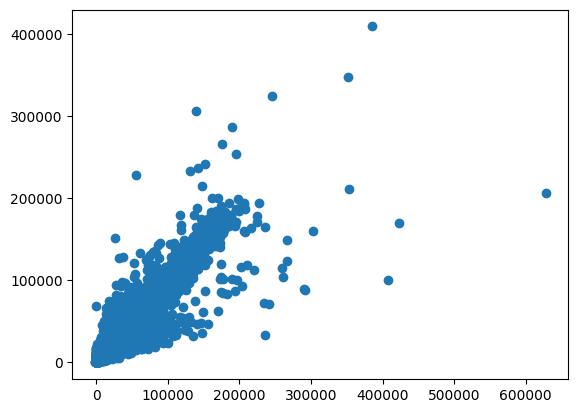

In [93]:
print(metrics.mean_squared_error(y_test,y_pred))
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_absolute_percentage_error(y_test, y_pred))
print(metrics.r2_score(y_test, y_pred))
#94% r2 score good accuracy
plt.scatter(y_test,y_pred)

<Axes: >

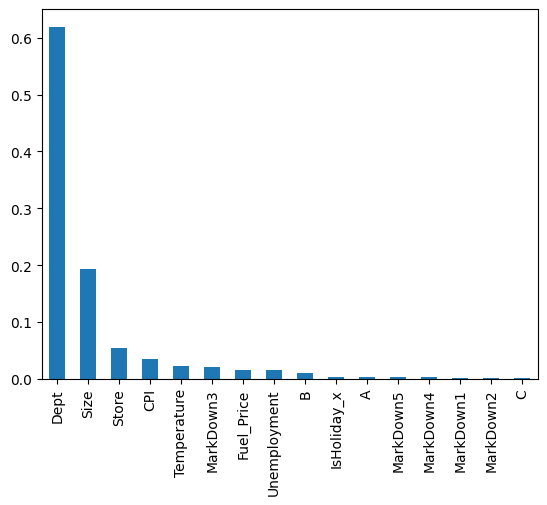

In [94]:
feature_importances = pd.Series(model_rf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_importances.plot.bar()

In [96]:
param_dist = {
    'n_estimators':[random.randint(10,100)],
    'max_depth': [random.randint(1,20)],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2),
    'max_features': [0.5, 1, "sqrt", "auto"]    
}

rf = RandomForestRegressor()

rs = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    scoring="neg_mean_squared_error",
    n_iter=5,
    cv = 5
)
rs.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=5,
                   param_distributions={'max_depth': [16],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': [67]},
                   scoring='neg_mean_squared_error')

In [97]:
best_rf = rs.best_estimator_

In [98]:
print(rs.best_params_)

{'n_estimators': 67, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 16}


In [99]:
y_pred = best_rf.predict(x_test)

135912934.88617224
7186.262980437147
9556425992023398.0
0.7328732683264005


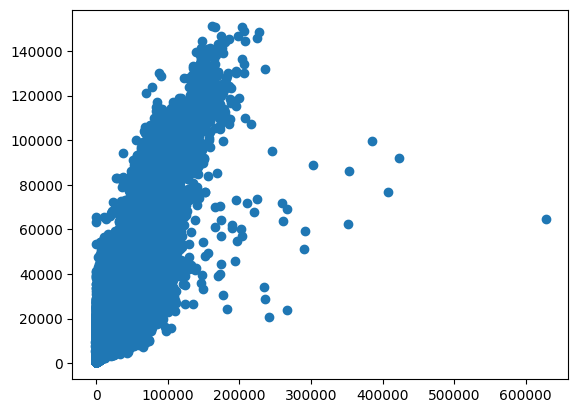

In [100]:
print(metrics.mean_squared_error(y_test,y_pred))
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_absolute_percentage_error(y_test, y_pred))
print(metrics.r2_score(y_test, y_pred))
#73% r2 score decent accuracy
plt.scatter(y_test,y_pred)

<Axes: >

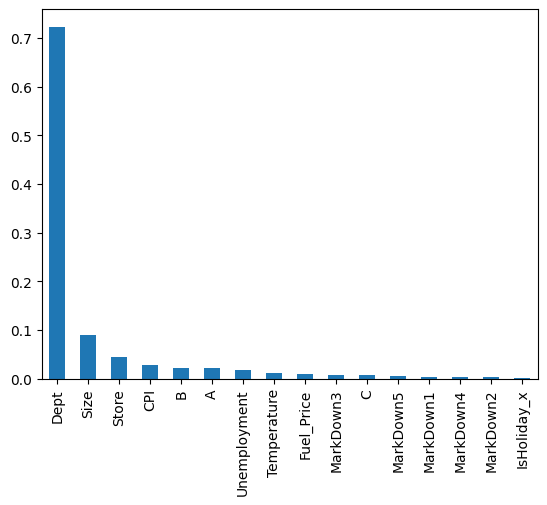

In [101]:
feature_importances = pd.Series(best_rf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_importances.plot.bar()

In [103]:
#xgboost regressor with basic parameters
model_xgb = xgb.XGBRegressor()
model_xgb = model_xgb.fit(x_train, y_train)
print(model_xgb)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [104]:
y_pred = model_xgb.predict(x_test)

42534691.38161422
3233.917282315336
3258796403484358.5
0.916401238034984


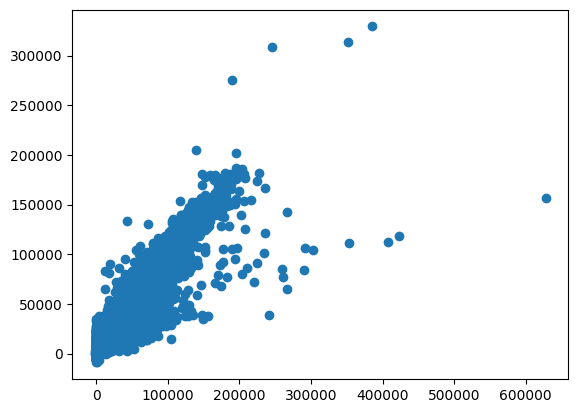

In [105]:
print(metrics.mean_squared_error(y_test,y_pred))
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_absolute_percentage_error(y_test, y_pred))
print(metrics.r2_score(y_test, y_pred))
#91.64% good performance accuracy
plt.scatter(y_test,y_pred)

In [106]:
#XGBoost Regressor using Grid Search cv
#it took 38 mins to train and find best model in xgb using gridsearchcv

param1 = {
    'nthread':[4],
    'objective':['reg:squarederror'],
    'learning_rate':[0.02,0.04,0.05,0.07],
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'subsample':[0.7],
    'colsample_bytree':[0.7],
    'n_estimators':[500],
}

gs = GridSearchCV(estimator = xgb.XGBRegressor(),
    param_grid=param1,
    cv=5,
    n_jobs=5,
    verbose=True)

gs.fit(x_train,y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.02, 0.04, 0.05, 0.07],
                         'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2),
                         'n_estimators': [500], 'nthread': [4],
                         'objective': ['reg:squarederror'],
                         'subsample': [0.7]},
             verbose=True)

In [107]:
gs.best_score_

0.9530711034597402

In [108]:
best_model_xgb = gs.best_estimator_

y_pred = best_model_xgb.predict(x_test)

24855187.27360512
2248.608440204246
1553089373531677.5
0.9511489841118215


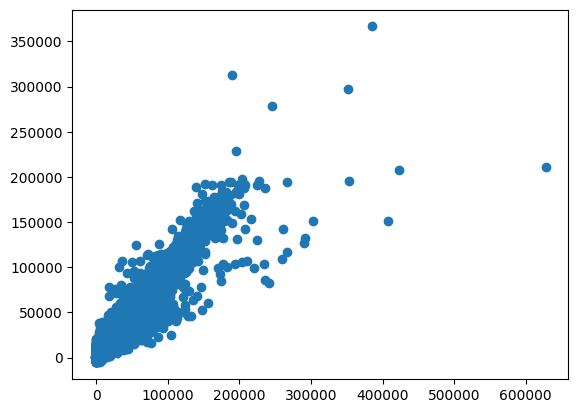

In [109]:
print(metrics.mean_squared_error(y_test,y_pred))
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_absolute_percentage_error(y_test, y_pred))
print(metrics.r2_score(y_test, y_pred))
#95.11%
plt.scatter(y_test,y_pred)

In [110]:
gs.best_index_

45

In [111]:
df_test = pd.read_csv(r"data\Data\Sales Forecasting\test.csv")

In [112]:
#going to use best_model_xgb to predict test results and save the output

df_features_stores_test = pd.merge(df_features_stores, df_test, on= ['Store', 'Date'], how='inner')

In [114]:
df_features_stores_test.shape

(115064, 16)

In [115]:
df_features_stores_test['MarkDown1'].fillna(0.0, inplace=True)
df_features_stores_test['MarkDown2'].fillna(0.0, inplace=True)
df_features_stores_test['MarkDown3'].fillna(0.0, inplace=True)
df_features_stores_test['MarkDown4'].fillna(0.0, inplace=True)
df_features_stores_test['MarkDown5'].fillna(0.0, inplace=True)

C:\Users\kanna\AppData\Local\Temp\ipykernel_43048\1942835640.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_features_stores_test['MarkDown1'].fillna(0.0, inplace=True)
C:\Users\kanna\AppData\Local\Temp\ipykernel_43048\1942835640.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [117]:
df_features_stores_test['IsHoliday_x'].replace({False:0.0, True:1.0}, inplace=True)

C:\Users\kanna\AppData\Local\Temp\ipykernel_43048\1296442842.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_features_stores_test['IsHoliday_x'].replace({False:0.0, True:1.0}, inplace=True)
C:\Users\kanna\AppData\Local\Temp\ipykernel_43048\1296442842.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting',

In [118]:
df_type = pd.get_dummies(df_features_stores_test['Type'], dtype=float)

In [119]:
data_new_test = pd.concat([df_type, df_features_stores_test], axis=1)

In [120]:
data_new_test.dtypes

A               float64
B               float64
C               float64
Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday_x     float64
Type             object
Size              int64
Dept              int64
IsHoliday_y        bool
dtype: object

In [121]:
data_new_f_test = data_new_test.drop(['Date','Type','IsHoliday_y'], axis=1)

In [123]:
data_new_f_test.dtypes

A               float64
B               float64
C               float64
Store             int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday_x     float64
Size              int64
Dept              int64
dtype: object

In [124]:
y_out = best_model_xgb.predict(data_new_f_test)

In [126]:
y_out.shape

(115064,)

In [127]:
df_test.shape

(115064, 4)

In [128]:
df_out = pd.concat([df_test, pd.DataFrame(y_out)], axis=1)

In [129]:
df_out

,Store,Dept,Date,IsHoliday,0
0,1,1,2012-11-02,False,24963.394531
1,1,1,2012-11-09,False,46778.906250
2,1,1,2012-11-16,False,11442.928711
3,1,1,2012-11-23,True,35412.355469
4,1,1,2012-11-30,False,24802.751953
...,...,...,...,...,...
115059,45,98,2013-06-28,False,737.886841
115060,45,98,2013-07-05,False,4245.937012
115061,45,98,2013-07-12,False,44116.718750
115062,45,98,2013-07-19,False,5104.761230


In [130]:
df_out.to_csv(r"outputs\sales_forecast_output.csv")